In [ ]:
from sympy import init_printing
init_printing()
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as smp
from matplotlib import animation
from matplotlib.animation import PillowWriter

A diagram of the problem at hand:

* The entire system depends on only two variables: $x$ and $\theta$
* We will use these variables as our free variables

<p align="center">
  <img src="../images/l_diagram1.png" alt="drawing" width="300" align="center"/>
</p>

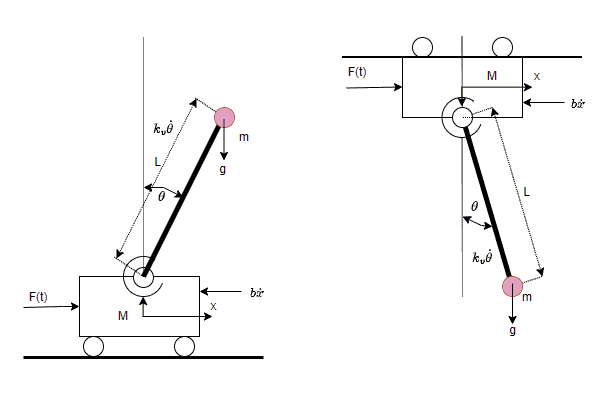

Define all symbols we need for this problem using sympy:

In [ ]:
t, g, l, m, M, b, kv, F, R = smp.symbols('t g l m M b kv F R')
xM, theta, R = smp.symbols(r'x \theta R', cls=smp.Function)

Define $\theta(t)$, $\dot{\theta}(t)$ and $\ddot{\theta}(t)$, also $x(t)$, $\dot{x}(t)$ and $\ddot{x}(t)$

In [ ]:
xM = xM(t)
theta = theta(t)
R = R(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)
x_d = smp.diff(xM, t)
x_dd = smp.diff(x_d, t)

Define the $x$ and $y$ coordinates of mass m

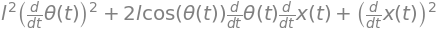

In [ ]:
x1 = xM + l*smp.sin(theta)
x1_d = smp.diff(x1,t)
y1 = l*smp.cos(theta)
y1_d= smp.diff(y1,t)
smp.simplify(x1_d**2 + y1_d**2)

Define both kinetic and potential energy:

* Kinetic energy $T$ comes from the motion of the two masses
* Potential energy $V$ comes from the gravitational potential energy of the small mass $mgy$. 
* Damping energy $R$ comes from viscous damping $k_v\dot{\theta}$ ̐and ${b}\dot{x}$

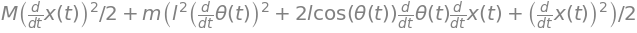

In [ ]:
from re import X
T = smp.Rational(1,2) * M * x_d**2 \
  + smp.Rational(1,2) * m * (x1_d**2 + y1_d**2)
V = m*g*y1
L = T - V
R = smp.Rational(1,2) * b * x_d**2 + smp.Rational(1,2) * kv * theta_d**2
smp.simplify(T)

Now we can look at the Lagrangian

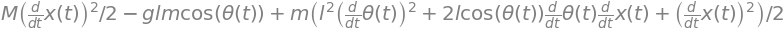

In [ ]:
smp.simplify(L)

Lagrange's extended equations includes Rayleigh function for damping loss

$$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x} +\frac{\partial R}{\partial \dot{x}} = Qx$$



$$\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} -\frac{\partial L}{\partial \theta} + \frac{\partial R}{\partial \dot{\theta}}= 0$$


In [ ]:
LE1 = smp.diff(smp.diff(L, x_d), t).simplify() - smp.diff(L, xM) + smp.diff(R, x_d) - F
LE2 = smp.diff(smp.diff(L, theta_d), t).simplify() - smp.diff(L, theta) + smp.diff(R, theta_d)

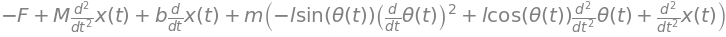

In [ ]:
smp.simplify(LE1)

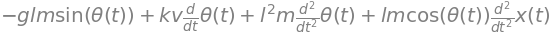

In [ ]:
smp.simplify(LE2)

Solve Lagranges equations (this assumes that `LE1` and `LE2` are both equal to zero
* First linearize each Lagrangian equation then solve

* These equations (which are **linear** in $\ddot{x}$ and $\ddot{\theta}$) for $\ddot{x}$ and $\ddot{\theta}$.

In [ ]:
LinX = -F + M*x_dd + b*x_d + m*(l*theta_dd +x_dd)         # Linearized LE1

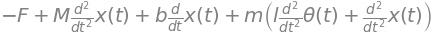

In [ ]:
LinX

In [ ]:
LinTh = -g*l*m*theta+kv*theta_d +l**2*m*theta_dd+l*m*x_dd   # Linearized LE2

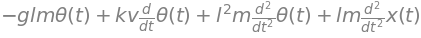

In [ ]:
LinTh

In [ ]:
sols = smp.solve([LinX, LinTh], (x_dd, theta_dd),simplify=False, rational=False)

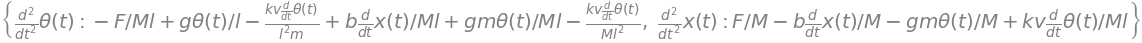

In [ ]:
sols       # display results